# PSEI Stock Performance: A Random Forest Classification Method

## 1. Introduction to Random Forest algorithm



Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.


Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name `Random Forest`. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.



## 2. Random Forest algorithm intuition


Random forest algorithm intuition can be divided into two stages. 


In the first stage, we randomly select “k” features out of total `m` features and build the random forest. In the first stage, we proceed as follows:-

1.	Randomly select `k` features from a total of `m` features where `k < m`.
2.	Among the `k` features, calculate the node `d` using the best split point.
3.	Split the node into daughter nodes using the best split.
4.	Repeat 1 to 3 steps until `l` number of nodes has been reached.
5.	Build forest by repeating steps 1 to 4 for `n` number of times to create `n` number of trees.


In the second stage, we make predictions using the trained random forest algorithm. 

1.	We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.
2.	Then, we calculate the votes for each predicted target.
3.	Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm.


## 3. Advantages and disadvantages of Random Forest algorithm


The advantages of Random forest algorithm are as follows:-


1.	Random forest algorithm can be used to solve both classification and regression problems.
2.	It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.
3.	Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem. 
4.	Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.
5.	Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.


The disadvantages of Random Forest algorithm are listed below:-


1.	The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.
2.	The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.


## 4. Feature selection with Random Forests



Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem. 


We measure the variable importance in a dataset by fitting the random forest algorithm to the data. During the fitting process, the out-of-bag error for each data point is recorded and averaged over the forest. 


The importance of the j-th feature was measured after training. The values of the j-th feature were permuted among the training data and the out-of-bag error was again computed on this perturbed dataset. The importance score for the j-th feature is computed by averaging the difference in out-of-bag error before and after the permutation over all trees. The score is normalized by the standard deviation of these differences.


Features which produce large values for this score are ranked as more important than features which produce small values. Based on this score, we will choose the most important features and drop the least important ones for model building. 


## 5. Dataset description


The dataset used here were ratios extract from **Bloomberg Terminal** of AB Capital.

## 6. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

## 7. Import and cleaning the datasets for training and backtesting

In [13]:
df_training = pd.read_csv('Base 4.1 Training.csv')
df_testing = pd.read_csv('Base 4.1 Back Test.csv')

X_training = df_training.iloc[:,7:]
X_test = df_testing.iloc[:,7:]

y_training = df_training.iloc[:,3]
y_test = df_testing.iloc[:,3]

## 8. Exploratory data analysis


Now, I will explore the data to gain insights about the data. 

### View top 5 rows of dataset

In [5]:
# preview the dataset

X_training.head()

,Operating Margins,ROE,ROA,Dividend Yield,Earnings Yield,Debt to Equity,Book Value Per Share,Profit Margin,Total Debt to Total Asset
0,22.74,22.80,192167.95,-11.06,7.08,149.50,24.72,13.82,54.61
1,22.10,22.80,197944.10,-10.09,7.30,144.31,25.85,14.77,54.70
2,26.53,23.18,199074.98,0.00,0.00,145.20,27.02,14.17,54.94
3,25.58,24.83,197143.23,0.00,0.00,136.27,27.46,14.65,53.26
4,22.63,25.47,199531.00,0.00,0.00,143.35,27.25,12.98,53.65


### Check column names

In [6]:
X_training.columns 

Index(['Operating Margins', 'ROE', 'ROA', 'Dividend Yield', 'Earnings Yield',
       'Debt to Equity', 'Book Value Per Share', 'Profit Margin',
       'Total Debt to Total Asset'],
      dtype='object')

We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [7]:
X_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Operating Margins          713 non-null    float64
 1   ROE                        713 non-null    float64
 2   ROA                        713 non-null    float64
 3   Dividend Yield             713 non-null    float64
 4   Earnings Yield             713 non-null    float64
 5   Debt to Equity             713 non-null    float64
 6   Book Value Per Share       713 non-null    float64
 7   Profit Margin              713 non-null    float64
 8   Total Debt to Total Asset  713 non-null    float64
dtypes: float64(9)
memory usage: 50.3 KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [8]:
for col in X_training.columns:
    print(X_training[col].value_counts())   

9.97     4
16.92    3
29.89    3
18.82    3
14.40    3
        ..
8.92     1
36.37    1
32.08    1
31.52    1
9.24     1
Name: Operating Margins, Length: 650, dtype: int64
17.60    4
6.21     3
12.63    3
19.17    3
13.61    3
        ..
9.02     1
9.27     1
9.14     1
7.87     1
12.12    1
Name: ROE, Length: 621, dtype: int64
311200.19    2
240675.17    2
388183.27    2
378684.37    2
376395.61    2
            ..
109364.00    1
110845.00    1
115635.00    1
115266.00    1
8228.51      1
Name: ROA, Length: 690, dtype: int64
 0.00     325
-0.72       2
-22.74      2
 3.92       2
-1.49       2
         ... 
 2.51       1
-5.53       1
-11.01      1
-20.68      1
 3.14       1
Name: Dividend Yield, Length: 366, dtype: int64
0.00     310
10.78      3
10.09      3
6.03       3
11.36      3
        ... 
12.69      1
10.16      1
8.73       1
7.95       1
5.29       1
Name: Earnings Yield, Length: 365, dtype: int64
90.00    3
87.88    2
85.28    2
92.47    2
88.39    2
        ..
68.94    

### Explore `class` variable

### Missing values in variables

In [9]:
# check missing values in variables

X_training.isnull().sum()

Operating Margins            0
ROE                          0
ROA                          0
Dividend Yield               0
Earnings Yield               0
Debt to Equity               0
Book Value Per Share         0
Profit Margin                0
Total Debt to Total Asset    0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

## Random Forest Classifier model with default parameters

In [14]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_training, y_training)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.4919


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

## 13. Random Forest Classifier model with parameter n_estimators=1000.

In [16]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

rfc_100.fit(X_training, y_training)

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 1000 decision-trees : 0.4919


The model accuracy score with 10 decision-trees is 0.4390 but the same with 1000 decision-trees is 0.4878. So, as expected accuracy decreases with number of decision-trees in the model.

## 14. Find important features with Random Forest model


Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy. 


First, I will create the Random Forest model as follows:-

In [18]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_training, y_training)

RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [19]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_training.columns).sort_values(ascending=False)

feature_scores

ROE                          0.130059
Operating Margins            0.128719
Profit Margin                0.126009
Book Value Per Share         0.119174
ROA                          0.119077
Total Debt to Total Asset    0.110932
Debt to Equity               0.110130
Dividend Yield               0.082315
Earnings Yield               0.073584
dtype: float64

The higher the score, the more important the feature is.

## 15. Visualize the feature scores of the features


Now, I will visualize the feature scores with matplotlib and seaborn.

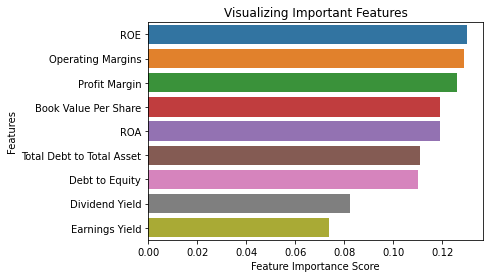

In [20]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

## 17. Build the Random Forest model on selected features

In [21]:
# declare feature vector and target variable

X_training_new= X_training.drop(['Dividend Yield','Earnings Yield'],axis=1)

X_test_new=X_test.drop(['Dividend Yield','Earnings Yield'],axis=1)

Now, I will build the random forest model and check accuracy.

In [22]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)

# fit the model to the training set

clf.fit(X_training_new, y_training)

# Predict on the test set results

y_pred = clf.predict(X_test_new)

# Check accuracy score 

print('Model accuracy score with some variables removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with some variables removed : 0.4274


## 18. Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [23]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n')

pd.DataFrame(cm)

Confusion matrix




,0,1
0,28,35
1,36,25


## 19. Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44        63
           1       0.42      0.41      0.41        61

    accuracy                           0.43       124
   macro avg       0.43      0.43      0.43       124
weighted avg       0.43      0.43      0.43       124



In [25]:
y_pred2 = clf.predict(X_training_new)

print(classification_report(y_training, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       380
           1       0.99      0.98      0.98       333

    accuracy                           0.98       713
   macro avg       0.98      0.98      0.98       713
weighted avg       0.98      0.98      0.98       713



In [26]:
pd.DataFrame(confusion_matrix(y_training, y_pred2))

,0,1
0,376,4
1,7,326
